In [1]:
!pip install pandas

In [2]:
!pip install folium

In [61]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [62]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Load Data

In [63]:
NL = pd.read_csv('data/Dataset_for_Solo_Project.csv', sep=';')
LS = pd.read_csv('data/LifeStyleNL.csv', sep=';')

## Population Dynamics data

In [64]:
NL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 190 entries, ID to NaturalizationsRelative_188
dtypes: float64(188), int64(1), object(1)
memory usage: 179.7+ KB


In [65]:
NL.shape

(121, 190)

In [66]:
NL.Periods = NL.Periods.str.replace('JJ00','')

In [67]:
NL.Periods=NL['Periods'].astype(int)

In [68]:
NL.head()


,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,k_80YearsOrOlder_9,GreenPressure_10,GreyPressure_11,TotalPopulation_12,NeverMarried_13,Married_14,Widowed_15,Divorced_16,TotalPopulation_17,NorthNetherlands_18,EastNetherlands_19,WestNetherlands_20,SouthNetherlands_21,TotalPopulation_22,LessThan5000Inhabitants_23,k_5000To19999Inhabitants_24,k_20000To49999Inhabitants_25,k_50000To99999Inhabitants_26,k_100000InhabitantsOrMore_27,TotalNumberOfMunicipalities_28,LessThan5000Inhabitants_29,k_5000To19999Inhabitants_30,k_20000To49999Inhabitants_31,k_50000To99999Inhabitants_32,k_100000InhabitantsOrMore_33,TotalForeignNationalities_34,American_35,Belgian_36,British_37,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43,PersonsWithSurinameseBackground_44,PersonsWithAntilleanBackground_45,TotalPrivateHouseholds_46,MalesAndFemales_47,Males_48,Females_49,MultiPersonHouseholds_50,AverageHouseholdsize_51,TotalPersonsInPrivateHouseholds_52,ChildrenInPrivateHouseholds_53,LiveBornChildren_54,Deaths_55,NaturalIncrease_56,Immigration_57,EmigrationIncludingAdministrativeC_58,NetMigration_59,TotalGrowth_60,TotalGrowthRelative_61,LiveBornChildren_62,LiveBornChildrenRelative_63,SexRatio_64,AverageNumberOfChildrenPerFemale_65,TotalLiveBornChildren_66,YoungerThan20Years_67,k_20To24Years_68,k_25To29Years_69,k_30YearsOrOlder_70,k_1stChild_71,k_2ndChild_72,k_3rdChild_73,k_4thAndSubsequentChildren_74,LiveBornChildrenMotherNotMarried_75,Deaths_76,DeathsRelative_77,DeathsSexRatio_78,LifeExpectancyAtBirthMale_79,LifeExpectancyAtBirthFemale_80,k_28WeeksOrMoreRelative_81,k_24WeeksOrMoreRelative_82,PerinatalMortality24_83,PerinatalMortality24Relative_84,PerinatalMortality28_85,PerinatalMortality28Relative_86,Deaths4WeeksAfterBirth_87,Deaths4WeeksAfterBirthRelative_88,Deaths1YearAfterBirth_89,Deaths1YearAfterBirthRelative_90,k_1To4Years_91,k_5To14Years_92,k_15To44Years_93,k_45To64Years_94,k_65To79Years_95,k_80YearsOrOlder_96,PersonsMovedWithinMunicipalities_97,TotalPersons_98,TotalPersonsRelative_99,WithinTheSameProvinceRelative_100,FamiliesUntil2010Relative_101,TotalImmigration_102,Dutch_103,TotalNonDutch_104,EuropeanUnionExcludingDutch_105,Moroccan_106,Turkish_107,TotalEmigrationIncludingAdministra_108,Dutch_109,TotalNonDutch_110,EuropeanUnionExcludingDutch_111,Moroccan_112,Turkish_113,TotalEmigrationExcludingAdministra_114,Dutch_115,TotalNonDutch_116,EuropeanUnionExcludingDutch_117,Moroccan_118,Turkish_119,TotalImmigration_120,TheNetherlands_121,EuropeanUnionExcludingTheNetherl_122,Indonesia_123,SurinameAndTheNetherlandsAntilles_124,Suriname_125,TheFormerNetherlandsAntilles_126,Morocco_127,Turkey_128,SpecificEmigrationCountries_129,TotalEmigrationIncludingAdministra_130,TheNetherlands_131,EuropeanUnionExcludingTheNetherl_132,Indonesia_133,SurinameAndTheNetherlandsAntilles_134,Suriname_135,TheFormerNetherlandsAntilles_136,Morocco_137,Turkey_138,SpecificEmigrationCountries_139,TotalEmigrationExcludingAdministra_140,TheNetherlands_141,EuropeanUnionExcludingTheNetherl_142,Indonesia_143,SurinameAndTheNetherlandsAntilles_144,Suriname_145,TheFormerNetherlandsAntilles_146,Morocco_147,Turkey_148,SpecificEmigrationCountries_149,TotalImmigration_150,EuropeanUnionExcludingTheNetherl_151,IndonesiaSurinameTheNetherlan_152,SurinameAndTheNetherlandsAntilles_153,Indonesia_154,Suriname_155,TheFormerNetherlandsAntilles_156,Morocco_157,Turkey_158,SpecificEmigrationCountries_159,TotalEmigrationExcludingAdministra_160,EuropeanUnionExcludingTheNetherl_161,IndonesiaSurinameTheNetherlan_162,SurinameAndTheNetherlandsAntilles_163,Indonesia_164,Suriname_165,TheFormerNetherlandsAntilles_166,Morocco_167,Turkey_168,SpecificEmigrationCountries_169,Marriages_170,MarriagesPer1000Inhabitants_171,MarriagesPer1000UnmarriedMen_172,k_1stMarriageForBothPartnersRelative_173,AverageAgeMarryingMales_174,AverageAgeMarryingFemales_175,MarriageDissolutions_176,MarriageDissolutionsPer1000Inhab_177,Marr

In [69]:
gender_df=NL[['Periods','Males_2','Females_3']]
gender_df=pd.melt(gender_df,id_vars=['Periods'])
gender_df.head()

,Periods,variable,value
0,1899,Males_2,NaN
1,1900,Males_2,2521.0
2,1901,Males_2,2550.0
3,1902,Males_2,2584.0
4,1903,Males_2,2622.0


In [70]:
NL.dtypes

ID                                            int64
Periods                                       int32
TotalPopulation_1                           float64
Males_2                                     float64
Females_3                                   float64
TotalPopulation_4                           float64
YoungerThan20Years_5                        float64
k_20To44Years_6                             float64
k_45To64Years_7                             float64
k_65To79Years_8                             float64
k_80YearsOrOlder_9                          float64
GreenPressure_10                            float64
GreyPressure_11                             float64
TotalPopulation_12                          float64
NeverMarried_13                             float64
Married_14                                  float64
Widowed_15                                  float64
Divorced_16                                 float64
TotalPopulation_17                          float64
NorthNetherl

## Life Style data

In [71]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 130 entries, ID to BloodDonors1870Years_125
dtypes: float64(125), int64(1), object(4)
memory usage: 1.1+ MB


In [72]:
LS.shape

(1113, 130)

In [73]:
LS.Periods = LS.Periods.str.replace('JJ00','')

In [74]:
LS.Periods=LS['Periods'].astype(int)

In [75]:
LS.head()

,ID,CharacteristicsPersons,Description,Margins,Periods,Smokers_1,FormerSmokers_2,PersonsWhoNeverSmoked_3,DailySmokersInThePopulation_4,DailySmokersAmongSmokers_5,HeavySmokersInThePopulation_6,HeavySmokersAmongSmokers_7,CigaretteSmokers_8,CigarettesPerDayPerSmoker_9,SmokingYearsCurrentCigaretteSmokers_10,QuittingAttemptsInThePast12Months_11,SmokingYearsFormerCigaretteSmokers_12,QuittingYearsFormerCigaretteSmokers_13,ECigarette_14,ECigaretteRegularlyOrEveryDay_15,AlmostNever_16,LessThan1HourPerDay_17,k_1HourPerDayOrMore_18,AlmostNever_19,LessThan1HourPerDay_20,k_1HourPerDayOrMore_21,AlmostNever_22,NotDaily_23,DailyLessThanOneHour_24,DailyOneHourOrMore_25,Drinkers_26,FormerDrinkers_27,PersonsWhoNeverDrankAlcohol_28,HeavyDrinkersInThePopulation_29,HeavyDrinkersAmongDrinkers_30,ExcessiveDrinkersInThePopulation_31,ExcessiveDrinkersAmongDrinkers_32,NumberOfAlcoholicBeveragesPerDay_33,UpTo1GlassPerDayInThePopulation_34,GuidelineAlcoholUse_35,LastMonth_36,LastYear_37,Ever_38,LastMonth_39,LastYear_40,Ever_41,LastMonth_42,LastYear_43,Ever_44,LastMonth_45,LastYear_46,Ever_47,LastMonth_48,LastYear_49,Ever_50,LastMonth_51,LastYear_52,Ever_53,LastMonth_54,LastYear_55,Ever_56,ReportedLength18YearsOrOlder_57,ReportedWeight18YearsOrOlder_58,Underweight_59,NormalWeight_60,Overweight_61,ModerateOverweight_62,SevereOverweight_63,ComplyWithPhysicalActivityGuidelines_64,SufficientlyActiveModerateIntensity_65,SufficientMuscleBoneStrengthActiv_66,WeeklySporter_67,SubscriptionSportsProvider_68,MemberSportsClub_69,Inactive_70,SemiActive_71,NormActive_72,Inactive_73,SemiActive_74,NormActive_75,MeetingTheCombinationNorm_76,WeeklySporter_77,HighRiskSexualActivity_78,RiskUnplannedPregnancy1649Years_79,HIVTest_80,STDTestExcludingHIVTest_81,UseOfContraceptionPillIncl1649_82,UseOfContraceptivePill1649Years_83,SufficientFruitDuring7DaysAWeek_84,AtLeast5DaysAWeekSufficientFruit_85,SufficientVegetablesDuring7DaysWeek_86,AtLeast5DaysWkSufficientVegetables_87,AtLeastOneDayAWeek_88,Min2DaysWeekOfWhich1XOilyFish_89,InThePast5Years_90,MoreThan5YearsAgo_91,Never_92,DonTKnow_93,InThePast2Years_94,MoreThan2YearsAgo_95,Never_96,DonTKnow_97,InThePast5Years_98,NotInThePast5Years_99,DonTKnow_100,InThePast12Months_101,MoreThan12MonthsAgo_102,Never_103,DonTKnow_104,InThePast12Months_105,MoreThan12MonthsAgo_106,Never_107,DonTKnow_108,InThePast12Months_109,MoreThan12MonthsAgo_110,Never_111,DonTKnow_112,InThePast2Years_113,MoreThan2YearsAgo_114,Never_115,DonTKnow_116,InThePast12Months_117,MoreThan12MonthsAgo_118,Never_119,DonTKnow_120,InfluenzaInoculation16YearsOrOlder_121,InformalCareGiver_122,HoursOfInformalCarePerWeek_123,StrainedInformalCareGivers_124,BloodDonors1870Years_125
0,0,T009002,Total,MW00000,2014,24.2,29.8,46.1,18.4,76.1,4.1,17.0,22.3,10.7,25.3,33.7,19.4,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.3,11.2,11.4,8.7,11.3,9.2,11.9,1.4,40.6,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,77.5,2.0,54.9,43.1,31.5,11.7,NaN,NaN,NaN,NaN,NaN,NaN,12.6,31.1,56.3,58.3,18.4,23.3,58.4,51.4,2.2,15.6,5.2,5.8,72.9,38.1,26.2,35.2,28.2,54.5,55.7,14.6,52.2,22.2,21.9,3.6,36.9,17.6,44.5,1.0,24.5,69.7,5.8,48.9,39.4,7.3,4.4,30.8,26.0,34.5,8.7,32.9,27.5,29.0,10.6,6.9,6.3,81.0,5.8,2.5,13.9,81.8,1.7,26.1,NaN,NaN,NaN,4.8
1,1,T009002,Total,MW00000,2015,24.6,28.8,46.6,18.2,74.0,3.8,15.3,22.6,10.4,25.6,33.1,19.3,19.8,NaN,NaN,78.1,13.2,8.7,84.2,11.3,4.6,NaN,NaN,NaN,NaN,77.1,11.1,11.8,9.5,12.3,8.9,11.6,1.3,41.4,40.3,4.1,6.7,20.1,1.8,3.8,8.9,0.4,1.2,3.7,0.9,2.6,6.5,0.6,1.5,3.9,0.7,1.4,4.9,5.0,8.4,21.4,174.1,77.2,2.3,54.7,43.0,31.4,11.6,NaN,NaN,NaN,NaN,20.0,26.0,12.4,32.4,55.2,57.6,19.7,22.7,57.1,52.1,2.5,16.6,4.4,5.4,71.6,34.4,28.6,37.6,30.3,56.2,56.0,15.4,52.5,23.4,20.8,3.2,36.7,18.4,43.4,1.4,24.7,69.2,6.1,48.9,39.6,7.1,4.5,30.7,25.9,33.7,9.6,32.7,26.7,29.4,11.2,10.6,5.2,79.1,5.2,3.1,13.3,81.2,2.3,24.4,14.9,11.3,14.7,4.5
2,2,T009002,Total,MW00000,2016,22.7,29.8,47.5,17.3,76.3,3.7,16.4,21.0,10.5,26.8,33.2,18.7,20.0,3.4,NaN,78.9,13.1,8.0,84.1,1

In [76]:
LS.dtypes

ID                                           int64
CharacteristicsPersons                      object
Description                                 object
Margins                                     object
Periods                                      int32
Smokers_1                                  float64
FormerSmokers_2                            float64
PersonsWhoNeverSmoked_3                    float64
DailySmokersInThePopulation_4              float64
DailySmokersAmongSmokers_5                 float64
HeavySmokersInThePopulation_6              float64
HeavySmokersAmongSmokers_7                 float64
CigaretteSmokers_8                         float64
CigarettesPerDayPerSmoker_9                float64
SmokingYearsCurrentCigaretteSmokers_10     float64
QuittingAttemptsInThePast12Months_11       float64
SmokingYearsFormerCigaretteSmokers_12      float64
QuittingYearsFormerCigaretteSmokers_13     float64
ECigarette_14                              float64
ECigaretteRegularlyOrEveryDay_1

## Population growth

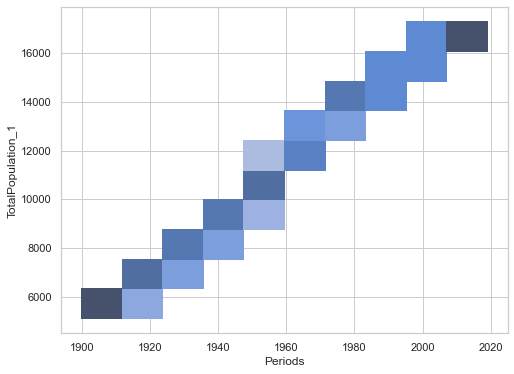

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(data=NL, x='Periods', y='TotalPopulation_1',bins=10);

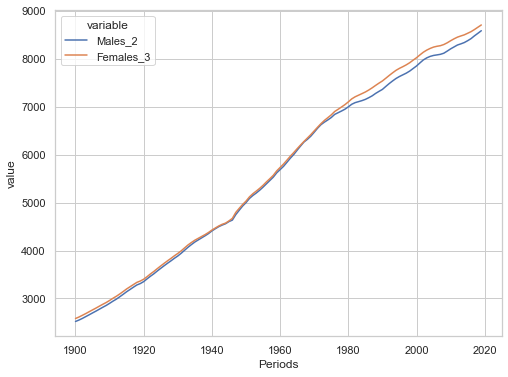

In [78]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gender_df, x='Periods', y='value',hue='variable');

## Foreigners

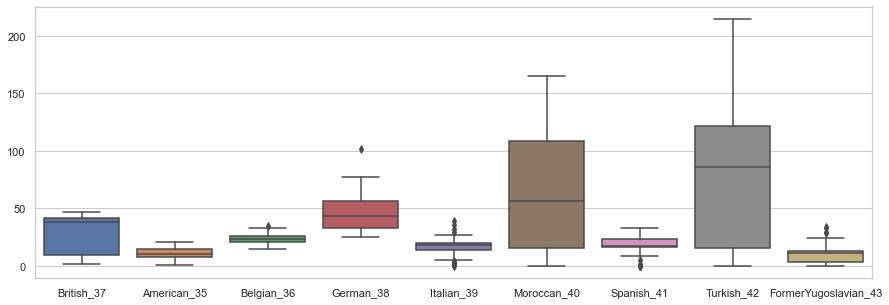

In [79]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.boxplot(data=NL[['British_37','American_35',"Belgian_36", 'German_38','Italian_39',
                     'Moroccan_40','Spanish_41', 'Turkish_42','FormerYugoslavian_43']]);

In [80]:
NL[['British_37','American_35',"Belgian_36", 'German_38','Italian_39',
                     'Moroccan_40','Spanish_41', 'Turkish_42','FormerYugoslavian_43']].describe()

,British_37,American_35,Belgian_36,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43
count,69.000000,68.000000,69.000000,69.000000,69.000000,67.000000,67.000000,68.000000,67.000000
mean,28.269565,10.522059,23.818841,47.052174,16.808696,65.947761,17.701493,83.852941,10.541791
std,16.317307,4.718583,3.602910,16.774575,7.589655,53.272565,9.038461,63.904702,7.613965
min,1.300000,0.500000,14.900000,24.900000,0.200000,0.000000,0.000000,0.000000,0.100000
25%,9.500000,7.375000,20.700000,33.200000,14.200000,15.950000,16.650000,15.700000,3.800000
50%,38.000000,10.600000,23.600000,43.700000,17.800000,56.600000,17.500000,86.400000,11.400000
75%,41.400000,14.600000,26.000000,56.400000,20.300000,108.850000,23.300000,121.450000,13.400000
max,47.300000,20.800000,34.400000,102.000000,39.100000,165.100000,32.700000,214.800000,33.500000


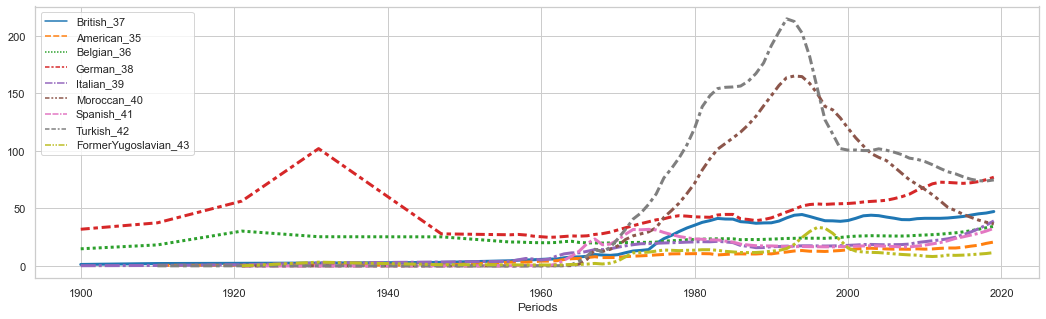

In [81]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
foreigners=['British_37','American_35','Belgian_36','German_38','Italian_39','Moroccan_40','Spanish_41','Turkish_42','FormerYugoslavian_43']
sns.lineplot(data=NL.set_index('Periods')[foreigners], palette="tab10", linewidth=3);

In [82]:
NL['%Foreigners'] = NL['TotalForeignNationalities_34']/NL['TotalPopulation_4']

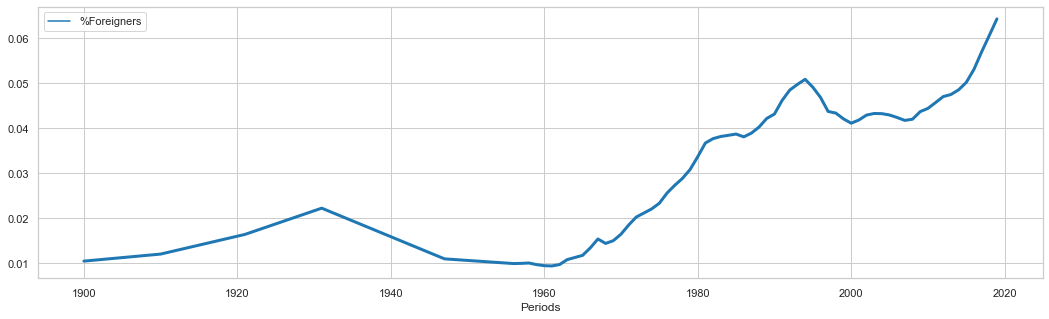

In [83]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['%Foreigners']
sns.lineplot(data=NL.set_index('Periods')[columns], palette="tab10", linewidth=3);

## Smoking & Drinking

In [84]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [85]:
import os
from IPython.display import Image, display, HTML

<b>Excessive drinkers among drinkers:</b> The percentage of drinkers aged 12 years or older who drink at least 21 glasses a week (men) or 14 glasses a week (women).\
<b>Quitting attempts in the past 12 months:</b> The percentage of the cigarette smokers aged 12 years or older who tried to stop smoking in the last 12 months, and succeeded for at least 24 hours.\
<b>Underweight:</b> The percentage of persons whose BMI is lower than 18,5 kg/m2.



In [86]:
@interact
def show_recs_more_than(column=list(LS.select_dtypes('number').columns), 
                          x=(5, 80, 1)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(LS.loc[LS[column] > x,
                   [ 'ExcessiveDrinkersAmongDrinkers_32', 'QuittingAttemptsInThePast12Months_11','Underweight_59']])

interactive(children=(Dropdown(description='column', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2',…

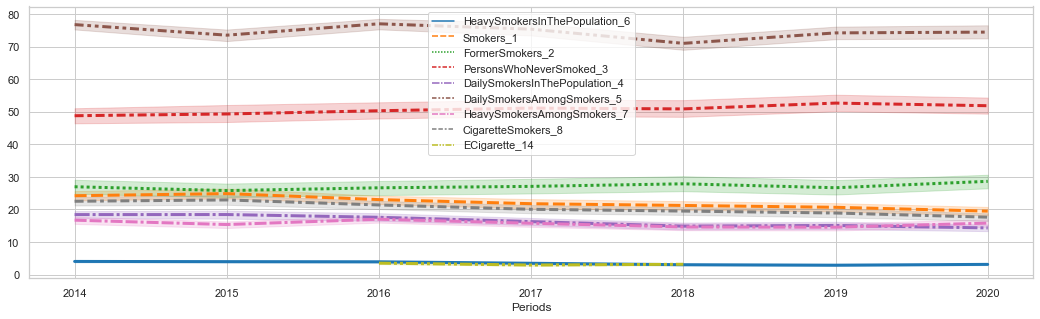

In [87]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['HeavySmokersInThePopulation_6','Smokers_1','FormerSmokers_2','PersonsWhoNeverSmoked_3','DailySmokersInThePopulation_4',
         'DailySmokersAmongSmokers_5','HeavySmokersInThePopulation_6','HeavySmokersAmongSmokers_7','CigaretteSmokers_8','ECigarette_14']                    
sns.lineplot(data=LS.set_index('Periods')[columns],  palette="tab10", linewidth=3);

## Correlating & Foreigners to different data

In [88]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

In [89]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=(NL.['%Foreigners']):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

SyntaxError: invalid syntax (<ipython-input-89-e8cbaf741ce8>, line 3)

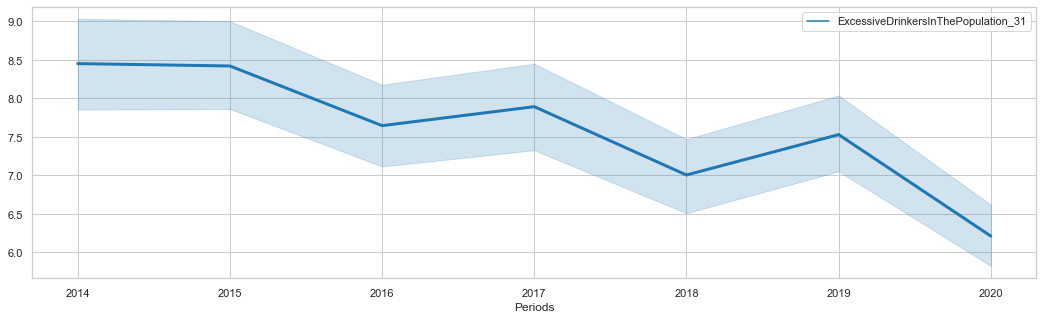

In [90]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=(['ExcessiveDrinkersInThePopulation_31'])
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3);

In [91]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

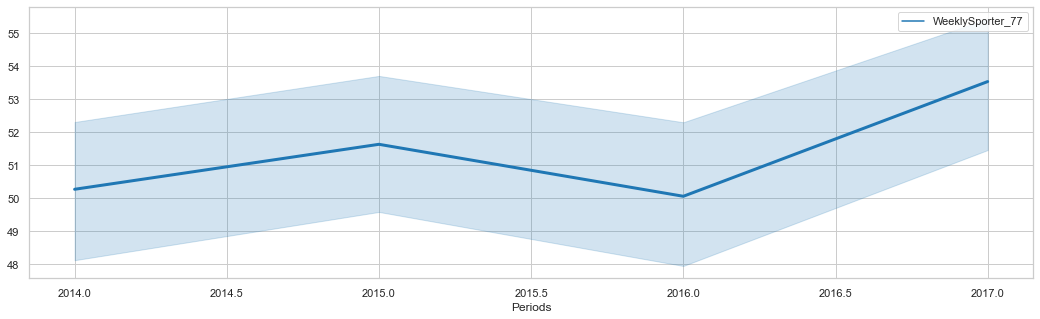

In [92]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['WeeklySporter_77']
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3);

In [93]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

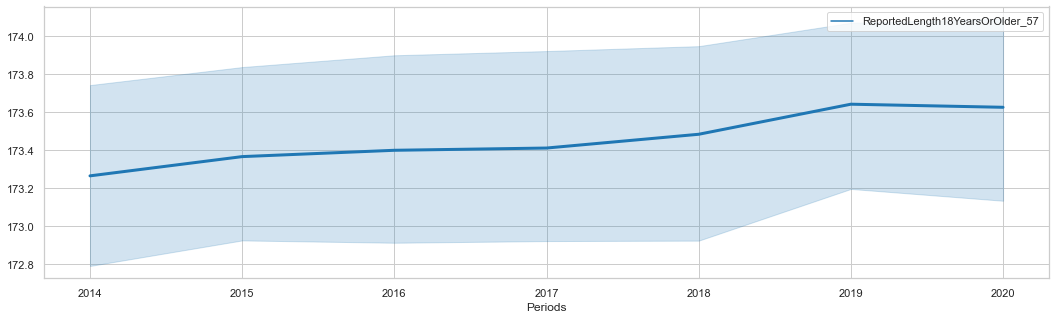

In [94]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['ReportedLength18YearsOrOlder_57']
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3);

## experiment

In [112]:
Foreigners_df=NL[['Periods','British_37','American_35','Belgian_36','German_38','Italian_39','Moroccan_40','Spanish_41','Turkish_42','FormerYugoslavian_43']]
Foreigners_df=pd.melt(Foreigners_df,id_vars=['Periods'])
Foreigners_df.head()

,Periods,variable,value
0,1899,British_37,NaN
1,1900,British_37,1.3
2,1901,British_37,NaN
3,1902,British_37,NaN
4,1903,British_37,NaN


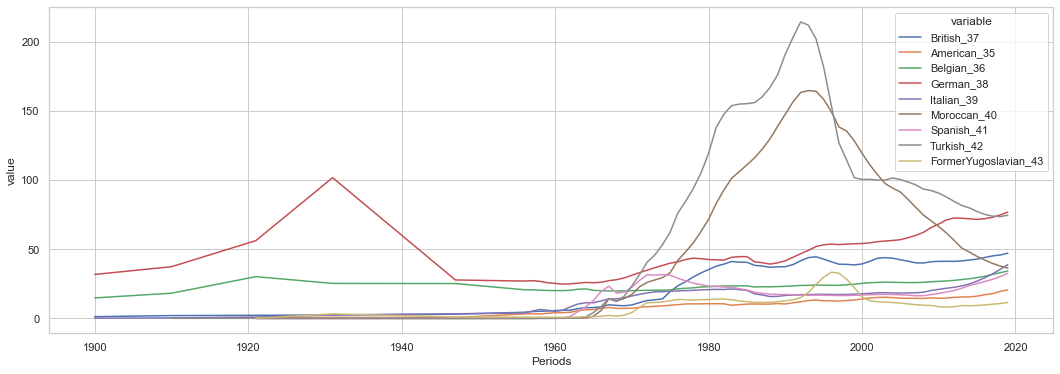

In [117]:
plt.figure(figsize=(18,6))
sns.lineplot(data=Foreigners_df, x='Periods', y='value',hue='variable');

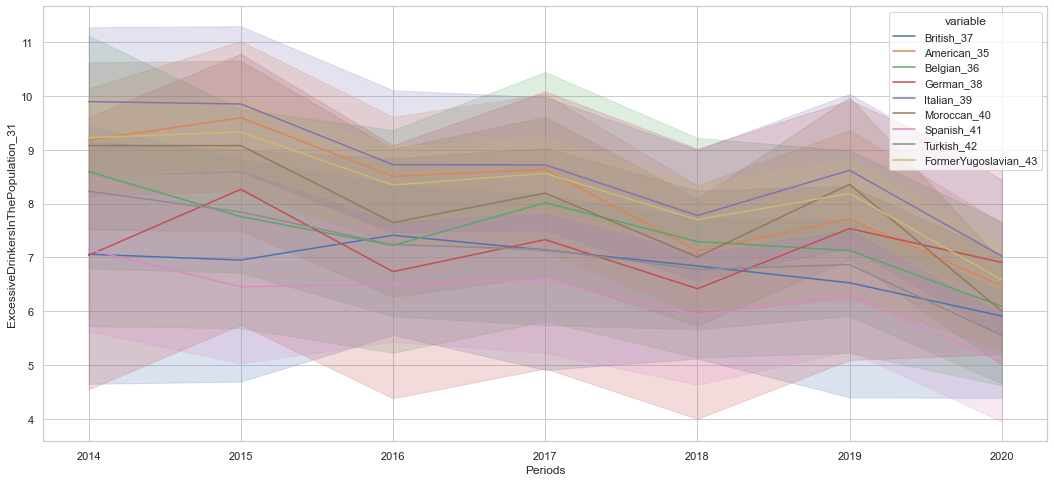

In [125]:
plt.figure(figsize=(18,8))

sns.lineplot(data=Foreigners_df,x=LS['Periods'], y=LS['ExcessiveDrinkersInThePopulation_31'],hue='variable');

## Obesity & Underweight

<b>Underweight:</b> The percentage of persons whose BMI is lower than 18,5 kg/m2\
<b>Normal Weight:</b> The percentage of persons whose BMI value is between 18,5 and 25,0 kg/m2\
<b>Overweight:</b> The percentage of persons whose BMI is 25,0 kg/m2 or more\
<b>Moderate Overweight:</b> The percentage of persons whose BMI is between 25,0 and 30,0 kg/m2\
<b>Severe Overweight:</b> The percentage of persons whose BMI is 30,0 kg/m2 or more           

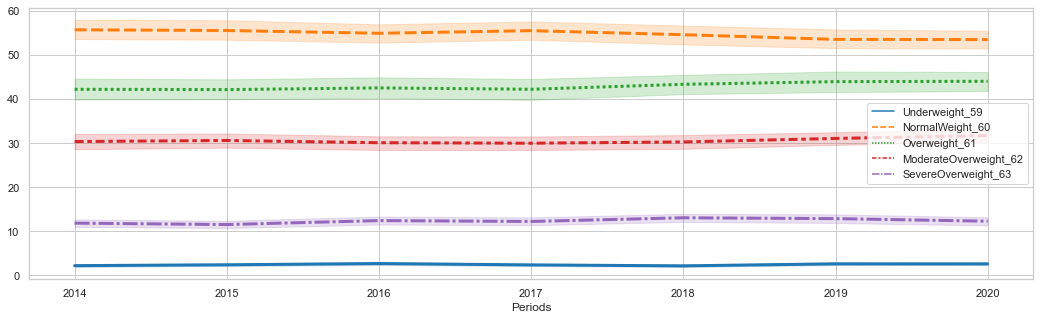

In [95]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['Underweight_59','NormalWeight_60','Overweight_61','ModerateOverweight_62','SevereOverweight_63']
sns.lineplot(data=LS.set_index('Periods')[columns],  palette="tab10", linewidth=3);

### % Severe Overweight vs Age

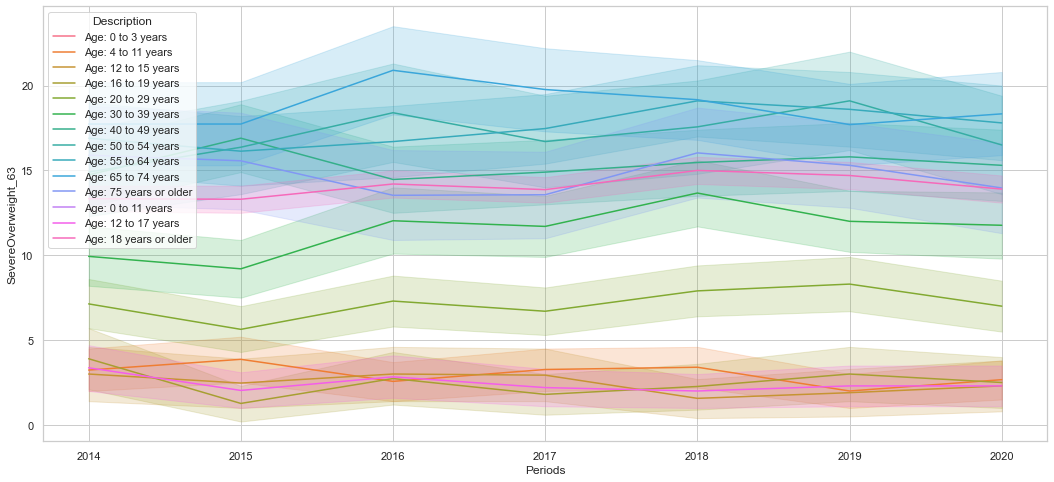

In [96]:
Age_filter = LS['Description'].str.startswith('Age:')

plt.figure(figsize=(18,8))

sns.lineplot(data=LS[Age_filter],x='Periods',y='SevereOverweight_63', hue='Description');

### % Severe Overweight vs Gender

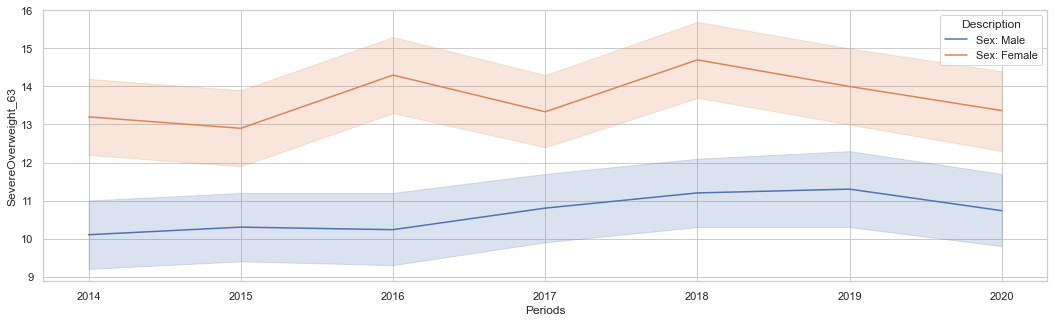

In [97]:
Sex_filter = LS['Description'].str.startswith('Sex:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Sex_filter],x='Periods',y='SevereOverweight_63', hue='Description');

### % Severe Overweight vs Position in a Family

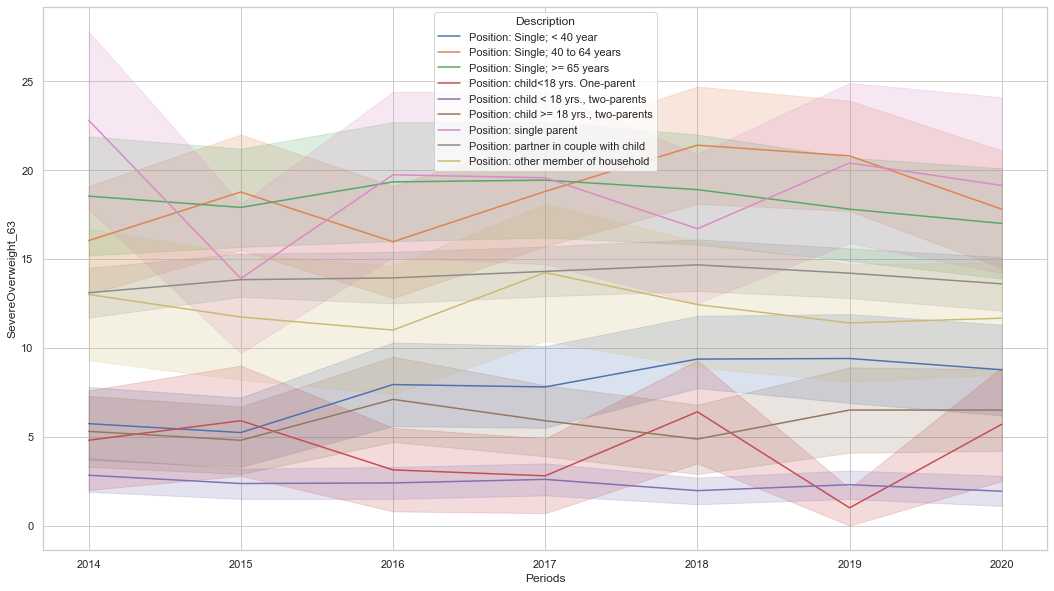

In [98]:
Position_filter = LS['Description'].str.startswith('Position:')
temp=LS[Position_filter]

plt.figure(figsize=(18,10))
sns.lineplot(data=temp,x='Periods', y='SevereOverweight_63',hue='Description');

### % Severe Overweight vs Backround

<b>Non-Western:</b> Person with a non-western migration background, originating from a country in Africa, South America or Asia (excl. Indonesia and Japan) or Turkey. 
Due to their socioeconomic and cultural position people from Indonesia and Japan residing in the Netherlands are considered as having a western migration background. They are mainly people born in the former Dutch East Indies and expatriates employed by Japanese companies with their families.\
<b>Western:</b> Person with a western migration background, originating from a country in Europe (excluding Turkey), North America or Oceania, or Indonesia or Japan.\
<b>1st generation non-western:</b>Person born abroad with at least one parent who was born abroad.\
<b>2nd generation non-western:</b>Person born in the Netherlands who has at least one parent born abroad.

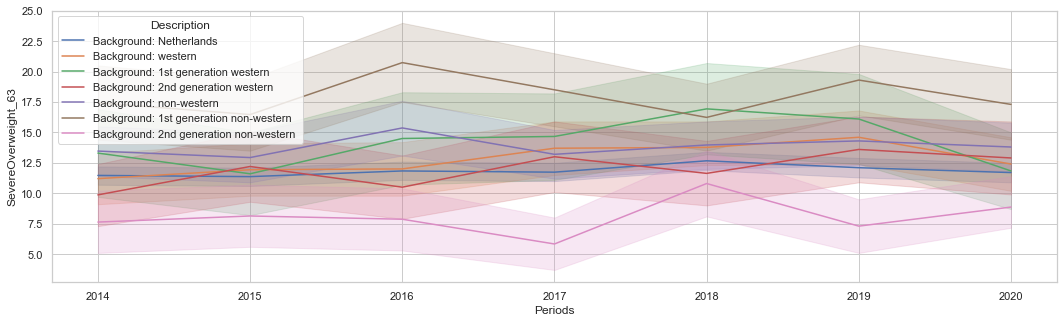

In [102]:
Background_filter = LS['Description'].str.startswith('Background:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Background_filter],x='Periods',y='SevereOverweight_63', hue='Description');

### % Severe Overweight vs Couples with no kids

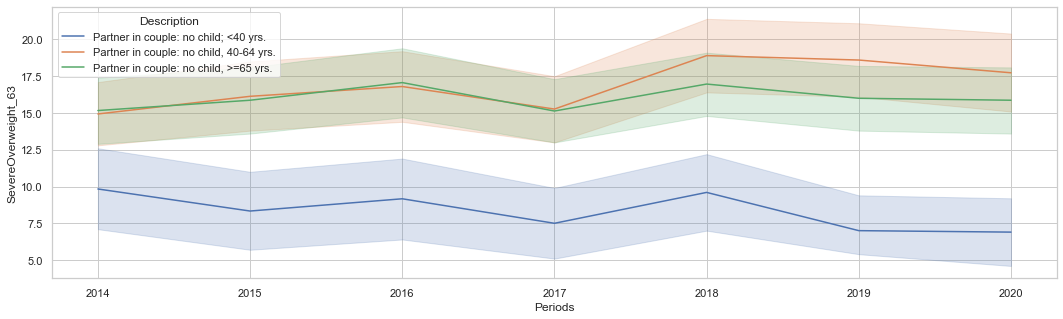

In [104]:
Partner_in_couple_filter = LS['Description'].str.startswith('Partner in couple:')

plt.figure(figsize=(18,5))
sns.lineplot(data=LS[Partner_in_couple_filter],x='Periods', y='SevereOverweight_63',hue='Description');

### % Severe Overweight vs Level of Education

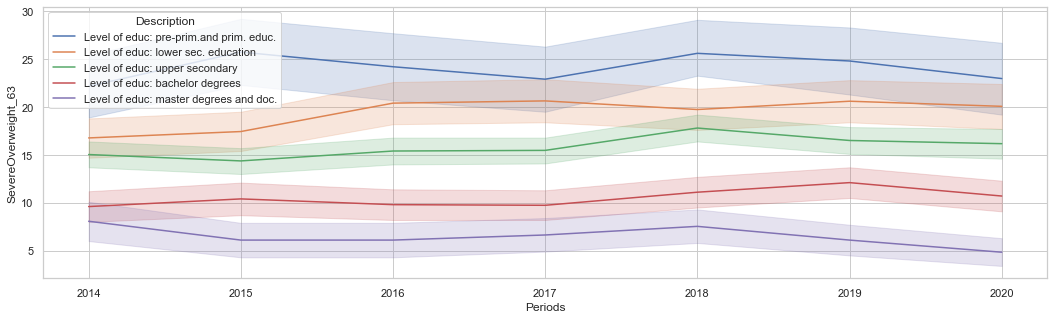

In [109]:
Level_Education_filter=LS['Description'].str.startswith('Level of educ:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Level_Education_filter],x='Periods', y='SevereOverweight_63',hue='Description');

## % Severe Overweight vs Wealth

<b>Wealth</b> equals assets minus liabilities.\
Assets are mainly bank balances, shares, real estate (own home), and business capital. Liabilities include mortgages on the house and consumer credit.                     
Households have been subdivided by level of equivalised wealth in five groups (quintiles) with an equal number of households.  The wealth boundaries between these five 20%-groups differ from year to year.\
In this case 5th group has the highest income and 1st group the lowest.

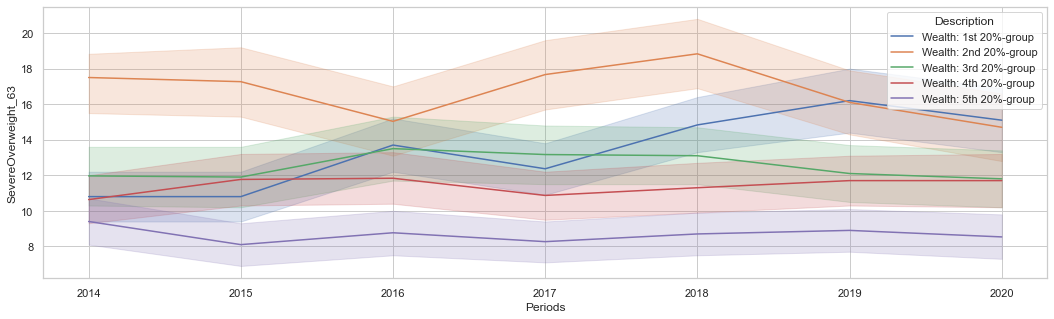

In [107]:
Wealth_filter= LS['Description'].str.startswith('Wealth:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Wealth_filter],x='Periods', y='SevereOverweight_63',hue='Description');

## References

CBS OpenData StatLine - Netherlands Population dynamics from 1899 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37556eng&_theme=1113

LyfeStyle from 2014 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83021ENG&_theme=1064